In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
bank = pd.read_csv('D:\Projects\TDAW\bank.csv')
bank.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 189, saw 5


In [ ]:
# Analyzing Distributions of Numerical Features

In [3]:
numerical_features = [col for col in bank.columns if np.issubdtype(bank[col].dtype, np.number)]
print(numerical_features)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [4]:
bank[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

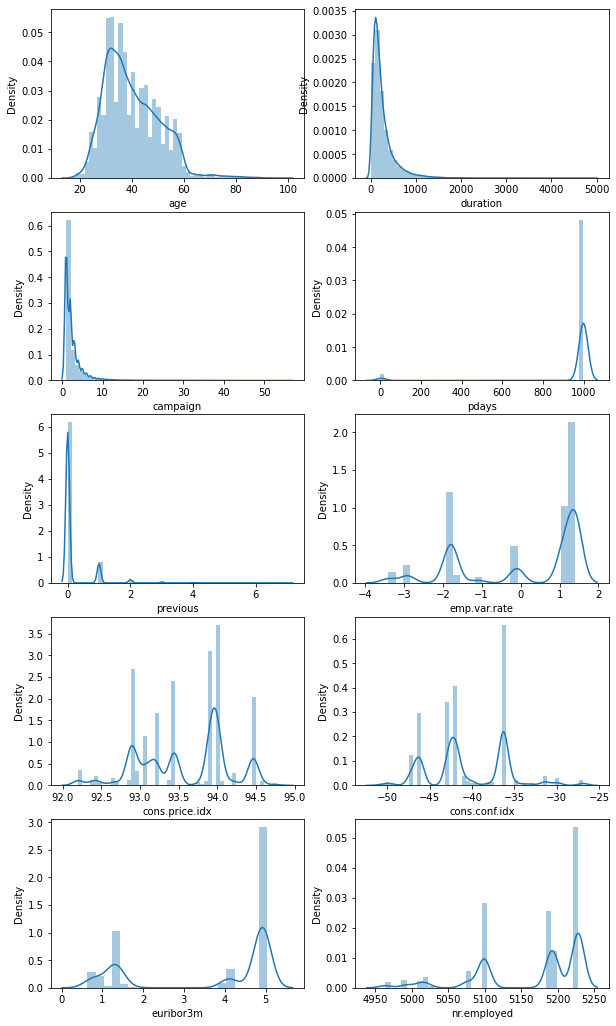

In [5]:
plt.figure(figsize=(10,18))
for index, col in enumerate(numerical_features):
    plt.subplot(5, 2, index+1)
    sns.distplot(bank[col])

In [ ]:
# Analyzing Distributions of Categorical Features 

In [10]:
categorical_features = [col for col in bank.columns if pd.api.types.is_string_dtype(bank[col])]
print(categorical_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


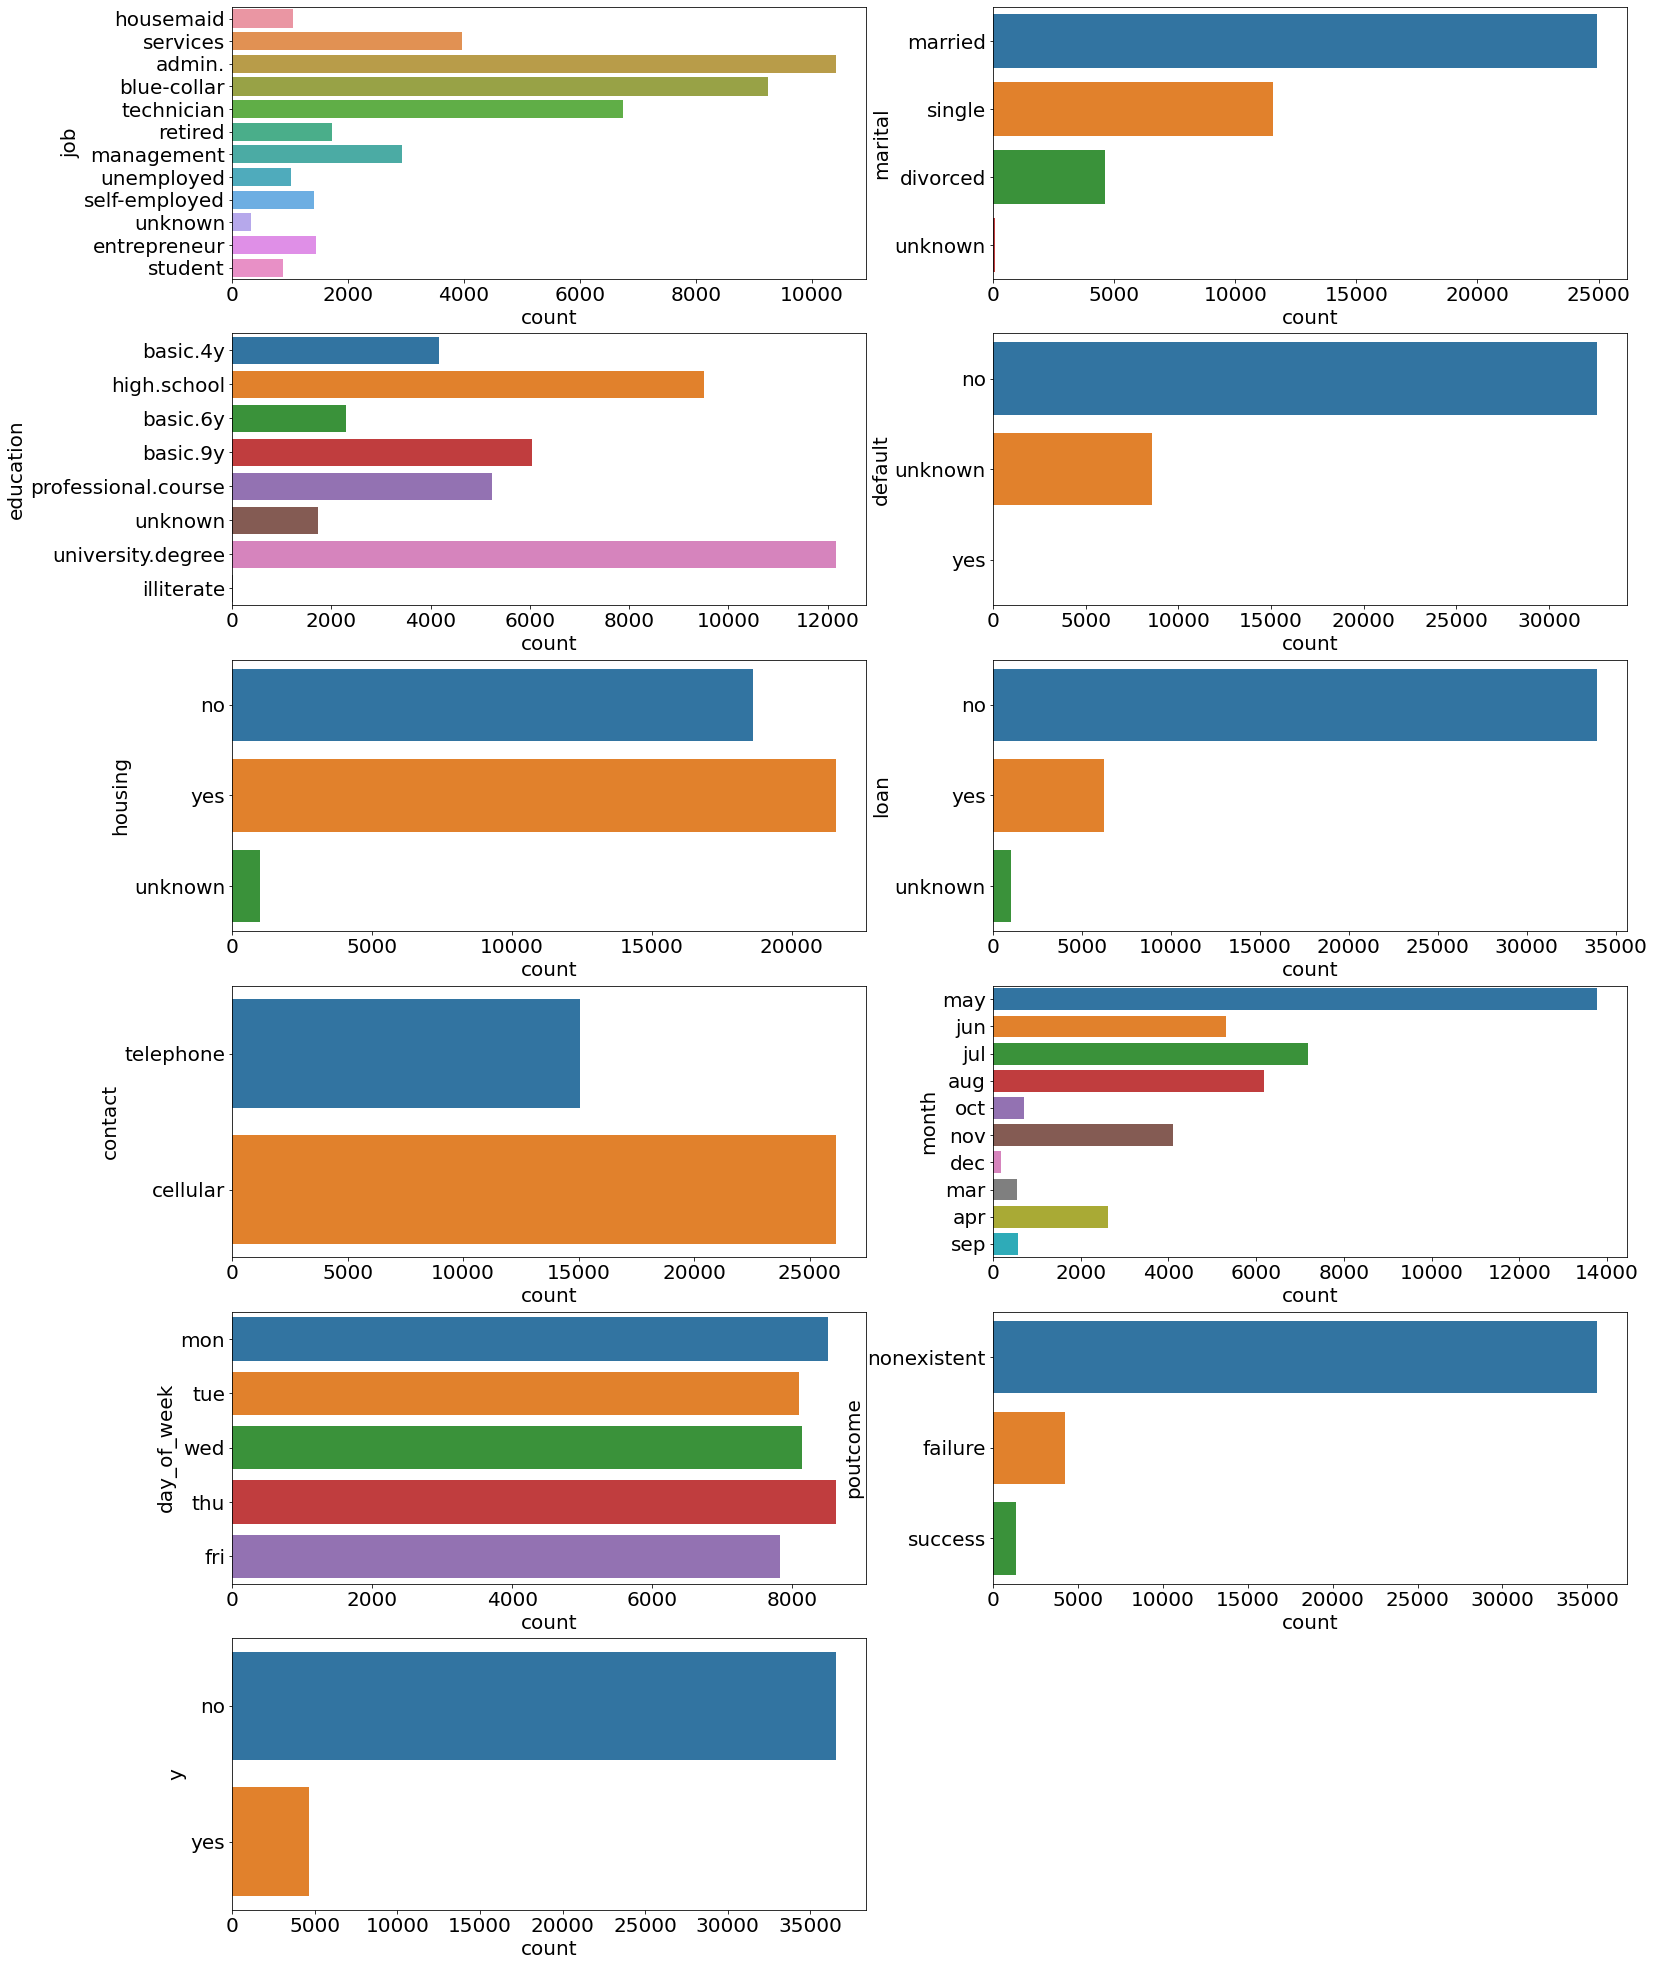

In [11]:
plt.figure(figsize=(25,35))
for index, col in enumerate(categorical_features):
    plt.subplot(6, 2, index+1)
    ax = sns.countplot(y=col, data=bank)
    ax.set_xlabel("count", fontsize=20)
    ax.set_ylabel(col, fontsize=20)
    ax.tick_params(labelsize=20)

In [12]:
print("Total number of entries:")
print(bank["y"].value_counts(ascending=True))
print()
print("Percentages:")
print(bank["y"].value_counts(normalize=True,ascending=True)*100)

Total number of entries:
yes     4640
no     36548
Name: y, dtype: int64

Percentages:
yes    11.265417
no     88.734583
Name: y, dtype: float64


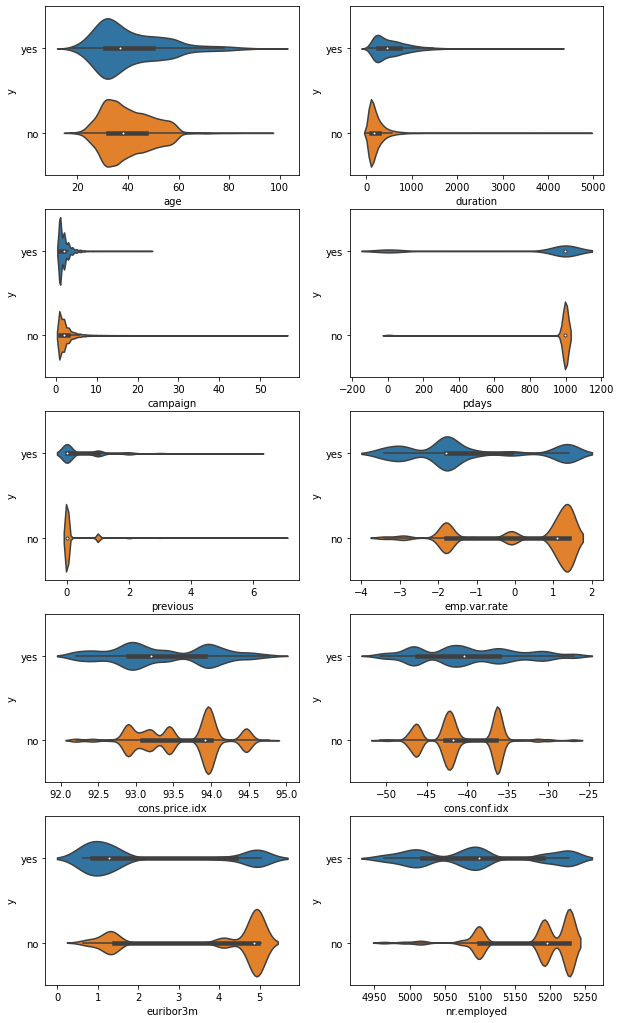

In [13]:
plt.figure(figsize=(10,18))
for index, col in enumerate(numerical_features):
    plt.subplot(5, 2, index+1)
    sns.violinplot(x=col, y="y", data=bank,order=["yes", "no"])

In [14]:
# Impact of Numerical Features on the Outcome

In [15]:
from scipy.stats import ttest_ind

def test_means(data, col):
    yes_mask = data["y"] =="yes"
    values_yes = data[col][yes_mask]
    values_no = data[col][~yes_mask]
    mean_yes = values_yes.mean()
    mean_no = values_no.mean()
    
    ttest_res = ttest_ind(values_yes, values_no)
    
    return [col, mean_yes, mean_no, round(ttest_res[0], 4), round(ttest_res[1], 4)]

In [16]:
test_df = pd.DataFrame(columns=["column", "mean yes", "mean no", "ttest stat", "ttest pval"])

for index, col in enumerate(numerical_features):
    test_df.loc[index] = test_means(bank, col)
    
test_df

,column,mean yes,mean no,ttest stat,ttest pval
0,age,40.913147,39.911185,6.1721,0.0
1,duration,553.191164,220.844807,89.9672,0.0
2,campaign,2.051724,2.633085,-13.4965,0.0
3,pdays,792.035560,984.113878,-69.7221,0.0
4,previous,0.492672,0.132374,48.0027,0.0
5,emp.var.rate,-1.233448,0.248875,-63.4337,0.0
6,cons.price.idx,93.354386,93.603757,-27.9032,0.0
7,cons.conf.idx,-39.789784,-40.593097,11.1539,0.0
8,euribor3m,2.123135,3.811491,-65.6466,0.0
9,nr.employed,5095.115991,5176.166600,-76.9845,0.0


In [17]:
## Hypothesis Test of the Difference of Distributions in Numerical Features

In [18]:
from scipy.stats import ks_2samp

def test_ks(data, col):
    yes_mask = data["y"] == "yes"
    values_yes = data[col][yes_mask]
    values_no = data[col][~yes_mask]
    
    kstest_res = ks_2samp(values_yes, values_no)
    return [col, round(kstest_res[0], 4), round(kstest_res[1], 4)]

In [19]:
test_df = pd.DataFrame(columns=["column", "ks stat", "ks pval"])

for index, col in enumerate(numerical_features):
    test_df.loc[index] = test_ks(bank, col)
    
test_df

,column,ks stat,ks pval
0,age,0.0861,0.0
1,duration,0.4641,0.0
2,campaign,0.0808,0.0
3,pdays,0.1934,0.0
4,previous,0.2102,0.0
5,emp.var.rate,0.4324,0.0
6,cons.price.idx,0.2281,0.0
7,cons.conf.idx,0.1998,0.0
8,euribor3m,0.4326,0.0
9,nr.employed,0.4324,0.0


In [20]:
## create arrays containing campaign and financial columns

campaign_columns = ["age", "duration", "campaign", "previous"]
financial_columns = ["emp.var.rate", "cons.price.idx", \
                     "cons.conf.idx", "euribor3m"]

<Figure size 720x720 with 0 Axes>

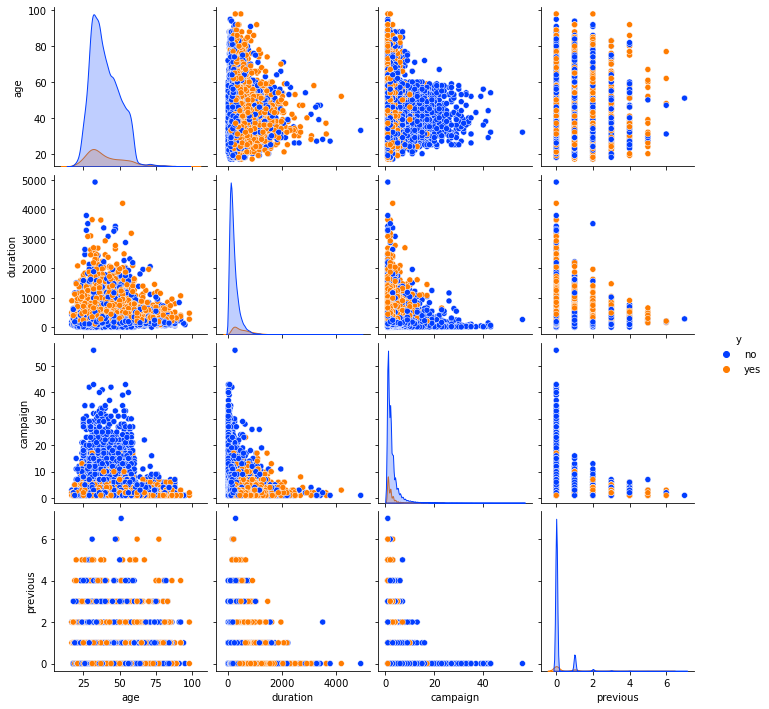

In [21]:
## create pairplot between campaign columns
plot_data = bank[campaign_columns + ["y"]]
plt.figure(figsize=(10,10))
sns.pairplot(plot_data, hue="y", palette="bright")

<Figure size 720x720 with 0 Axes>

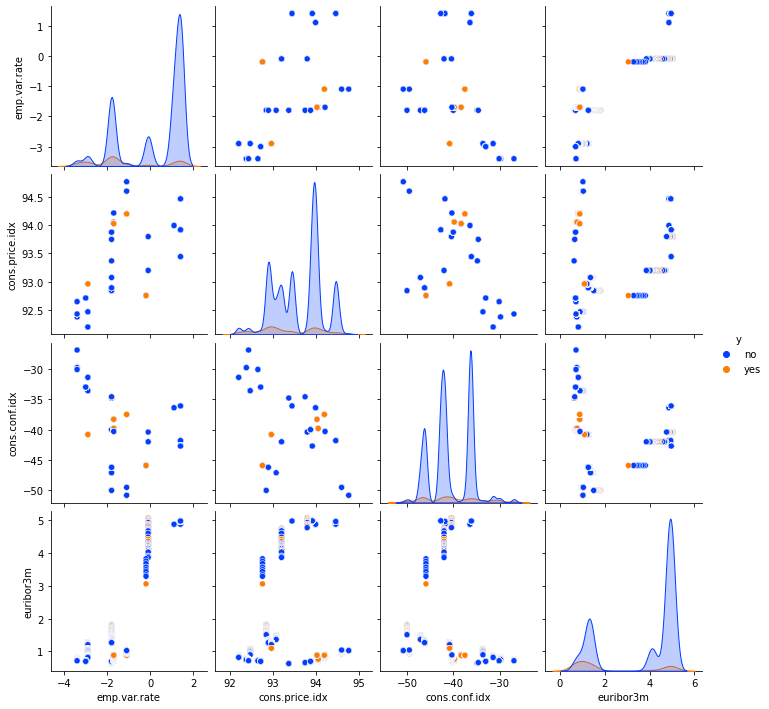

In [22]:
## create pairplot between financial features
plot_data = bank[financial_columns + ["y"]]
plt.figure(figsize=(10,10))
sns.pairplot(plot_data, hue="y", palette="bright")

In [23]:
## Analyze the correlations between the different numerical features

In [24]:
successful_calls = bank.y == "yes"

### plot correlation matrix for successful calls
plot_data = bank[campaign_columns + financial_columns][successful_calls]
successful_corr = plot_data.corr()
successful_corr.style.background_gradient(cmap='RdPu').set_precision(2)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_2144/3505119510.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  successful_corr.style.background_gradient(cmap='RdPu').set_precision(2)


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.00,-0.06,-0.01,0.07,-0.08,-0.02,0.14,-0.09
duration,-0.06,1.00,0.16,-0.23,0.50,0.24,-0.14,0.50
campaign,-0.01,0.16,1.00,-0.10,0.22,0.12,-0.04,0.21
previous,0.07,-0.23,-0.10,1.00,-0.28,0.09,0.13,-0.39
emp.var.rate,-0.08,0.50,0.22,-0.28,1.00,0.66,-0.27,0.93
cons.price.idx,-0.02,0.24,0.12,0.09,0.66,1.00,-0.33,0.41
cons.conf.idx,0.14,-0.14,-0.04,0.13,-0.27,-0.33,1.00,-0.12
euribor3m,-0.09,0.50,0.21,-0.39,0.93,0.41,-0.12,1.00


In [25]:
### plot correlation matrix for unsuccessful calls
plot_data = bank[campaign_columns + financial_columns][~successful_calls]
unsuccessful_corr = plot_data.corr()
unsuccessful_corr.style.background_gradient(cmap='RdPu').set_precision(2)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_2144/2278893082.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  unsuccessful_corr.style.background_gradient(cmap='RdPu').set_precision(2)


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.00,0.00,0.01,-0.00,0.03,0.01,0.12,0.04
duration,0.00,1.00,-0.08,-0.00,0.00,0.02,0.00,0.01
campaign,0.01,-0.08,1.00,-0.07,0.13,0.12,-0.01,0.12
previous,-0.00,-0.00,-0.07,1.00,-0.42,-0.27,-0.14,-0.44
emp.var.rate,0.03,0.00,0.13,-0.42,1.00,0.80,0.32,0.98
cons.price.idx,0.01,0.02,0.12,-0.27,0.80,1.00,0.15,0.73
cons.conf.idx,0.12,0.00,-0.01,-0.14,0.32,0.15,1.00,0.39
euribor3m,0.04,0.01,0.12,-0.44,0.98,0.73,0.39,1.00


In [26]:
### plot difference of successful - unsuccessful correlation matrices

diff_corr = successful_corr - unsuccessful_corr
diff_corr.style.background_gradient(cmap='RdPu').set_precision(2)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_2144/694759758.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  diff_corr.style.background_gradient(cmap='RdPu').set_precision(2)


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,0.00,-0.06,-0.02,0.08,-0.11,-0.04,0.02,-0.13
duration,-0.06,0.00,0.24,-0.23,0.50,0.22,-0.15,0.49
campaign,-0.02,0.24,0.00,-0.04,0.09,-0.01,-0.04,0.10
previous,0.08,-0.23,-0.04,0.00,0.14,0.36,0.27,0.05
emp.var.rate,-0.11,0.50,0.09,0.14,0.00,-0.14,-0.59,-0.05
cons.price.idx,-0.04,0.22,-0.01,0.36,-0.14,0.00,-0.48,-0.32
cons.conf.idx,0.02,-0.15,-0.04,0.27,-0.59,-0.48,0.00,-0.51
euribor3m,-0.13,0.49,0.10,0.05,-0.05,-0.32,-0.51,0.00


In [27]:
# Linear Regression

In [29]:
import statsmodels.api as sm

X = bank[["emp.var.rate", "cons.price.idx", "euribor3m"]]
X = sm.add_constant(X)
y = bank["cons.conf.idx"]

linear_regression_model = sm.OLS(y, X)
result = linear_regression_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          cons.conf.idx   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     2960.
Date:                Mon, 28 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:54:49   Log-Likelihood:            -1.1753e+05
No. Observations:               41188   AIC:                         2.351e+05
Df Residuals:                   41184   BIC:                         2.351e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -82.4025      5.999    -13.

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [30]:
# Logistic Regression

In [31]:
X = bank[["age", "duration", "campaign", "previous"]]
X = sm.add_constant(X)
y = np.where(bank["y"] == "yes", 1, 0)

logistic_regression_model = sm.Logit(y, X)
result = logistic_regression_model.fit()
print(result.summary())

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.269969
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41183
Method:                           MLE   Df Model:                            4
Date:                Mon, 28 Feb 2022   Pseudo R-squ.:                  0.2331
Time:                        12:54:49   Log-Likelihood:                -11119.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7793      0.076    -49.435      0.000      -3.929      -3.629
age            0.0091      0.

In [32]:
# Logistic Regression on the Full Marketing Campaign Data

In [33]:
## transform all the features into numerical values

X = bank.drop("y", axis=1)
X = pd.get_dummies(X)
X = sm.add_constant(X)
print(X.columns)

Index(['const', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [34]:
y = np.where(bank["y"] == "yes", 1 ,0)

In [33]:
full_logistic_regression_model = sm.Logit(y, X)
result = full_logistic_regression_model.fit(maxiter=500)
print(result.summary())

         Current function value: 0.207316
         Iterations: 500
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41135
Method:                           MLE   Df Model:                           52
Date:                Sun, 27 Feb 2022   Pseudo R-squ.:                  0.4111
Time:                        15:57:24   Log-Likelihood:                -8538.9
converged:                      False   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -63.5103        nan        nan        nan         nan         nan
age    

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Creating a Leaner Logistic Regression Model

In [39]:
import statsmodels.api as sm

columns = ["duration", "campaign", "pdays", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]
X = bank[columns]
X = sm.add_constant(X)
X.head()

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,1.0,261,1,999,1.1,93.994,-36.4,4.857
1,1.0,149,1,999,1.1,93.994,-36.4,4.857
2,1.0,226,1,999,1.1,93.994,-36.4,4.857
3,1.0,151,1,999,1.1,93.994,-36.4,4.857
4,1.0,307,1,999,1.1,93.994,-36.4,4.857


In [40]:
y = np.where(bank["y"] == "yes", 1, 0)

In [41]:
logistic_regression_model = sm.Logit(y, X)
result = logistic_regression_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.220751
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41180
Method:                           MLE   Df Model:                            7
Date:                Mon, 28 Feb 2022   Pseudo R-squ.:                  0.3729
Time:                        13:03:22   Log-Likelihood:                -9092.3
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -90.4650      5.683    -15.919      0.000    -101.603     -79.327
duration         